In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
%matplotlib inline

pd.options.display.float_format = '{:.4f}'.format #取消科学计数
pd.set_option('display.max_columns', 100) #显示所有列
pd.options.mode.chained_assignment = None

loan_data=pd.read_csv(r'D:\thf\python\kaggle\loan\loan.csv',low_memory=False)


In [91]:
loan_data.shape

(887379, 74)

In [92]:
loan_data.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0000,5000.0000,4975.0000,36 months,10.6500,162.8700,B,B2,NaN,10+ years,RENT,24000.0000,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.6500,0.0000,Jan-1985,1.0000,nan,nan,3.0000,0.0000,13648.0000,83.7000,9.0000,f,0.0000,0.0000,5861.0714,5831.7800,5000.0000,861.0700,0.0000,0.0000,0.0000,Jan-2015,171.6200,NaN,Jan-2016,0.0000,nan,1.0000,INDIVIDUAL,nan,nan,NaN,0.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,1077430,1314167,2500.0000,2500.0000,2500.0000,60 months,15.2700,59.8300,C,C4,Ryder,< 1 year,RENT,30000.0000,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.0000,0.0000,Apr-1999,5.0000,nan,nan,3.0000,0.0000,1687.0000,9.4000,4.0000,f,0.0000,0.0000,1008.7100,1008.7100,456.4600,435.1700,0.0000,117.0800,1.1100,Apr-2013,119.6600,NaN,Sep-2013,0.0000,nan,1.0000,INDIVIDUAL,nan,nan,NaN,0.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


**数据预处理**

In [176]:
#处理缺失值
na_cols=loan_data.isnull().sum()/len(loan_data)
na_cols[na_cols.values>0.25]

desc                          0.8580
mths_since_last_delinq        0.5120
mths_since_last_record        0.8456
next_pymnt_d                  0.2851
mths_since_last_major_derog   0.7502
annual_inc_joint              0.9994
dti_joint                     0.9994
verification_status_joint     0.9994
open_acc_6m                   0.9759
open_il_6m                    0.9759
open_il_12m                   0.9759
open_il_24m                   0.9759
mths_since_rcnt_il            0.9765
total_bal_il                  0.9759
il_util                       0.9790
open_rv_12m                   0.9759
open_rv_24m                   0.9759
max_bal_bc                    0.9759
all_util                      0.9759
inq_fi                        0.9759
total_cu_tl                   0.9759
inq_last_12m                  0.9759
dtype: float64

In [177]:
#将缺失值超过25%的列删除
na_col=list(na_cols[na_cols.values>0.25].index)
loan_data.drop(labels=na_col,axis=1,inplace=True)
loan_data.shape

(887379, 52)

In [178]:
#删除唯一值只有一个的列
unique=loan_data.nunique()
uni_col=list(unique[unique.values==1].index)
loan_data.drop(labels=uni_col,axis=1,inplace=True)
loan_data.shape

(887379, 51)

In [179]:
#针对贷款状态这列,只保留default，fully paid，charged off三个状态
status=loan_data.loan_status.value_counts()
print(status)
loan_data=loan_data[loan_data.loan_status.isin(['Fully Paid','Charged Off','Default'])]
print(loan_data.shape)
print(loan_data.loan_status.value_counts())

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64
(254190, 51)
Fully Paid     207723
Charged Off     45248
Default          1219
Name: loan_status, dtype: int64


In [180]:
#处理目标变量：loan_taraget
#目标变量有两个值：坏账和结清，坏账为1，结清为0
def target(status):
    if status=='Fully Paid':
        return 0
    else:
        return 1

loan_data['loan_status']=loan_data['loan_status'].map(target)
print(loan_data.loan_status.value_counts())

0    207723
1     46467
Name: loan_status, dtype: int64


In [181]:
#移除不需要分析的列
drop_features=['id','member_id','url','zip_code','zip_code','application_type','last_pymnt_d','last_credit_pull_d','verification_status','pymnt_plan','funded_amnt','funded_amnt_inv','sub_grade','out_prncp','out_prncp_inv','total_pymnt_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','initial_list_status','earliest_cr_line','tot_coll_amt','tot_cur_bal','total_rev_hi_lim']
loan_data.drop(labels=drop_features,axis=1,inplace=True)
loan_data.shape

(254190, 24)

In [182]:
#填充缺失值（数值型特征用平均值）
loan_data['emp_title'].fillna('Unknown',inplace = True)
loan_data['title'].fillna('Unknown',inplace = True)
loan_data['revol_util'].fillna(loan_data['revol_util'].mean(),inplace = True)
loan_data['collections_12_mths_ex_med'].fillna(loan_data['collections_12_mths_ex_med'].mean(),inplace = True)
loan_data.isnull().sum()

loan_amnt                        0
term                             0
int_rate                         0
installment                      0
grade                            0
emp_title                        0
emp_length                    9968
home_ownership                   0
annual_inc                       0
issue_d                          0
loan_status                      0
purpose                          0
title                            0
addr_state                       0
dti                              0
delinq_2yrs                      0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                       0
total_acc                        0
collections_12_mths_ex_med       0
acc_now_delinq                   0
dtype: int64

In [183]:
#处理emp_length列’
print(loan_data['emp_length'].value_counts(dropna=False))
loan_data['emp_length_int'] = np.nan

for col in [loan_data]:
    col.loc[col['emp_length'] == '10+ years', "emp_length_int"] = 10
    col.loc[col['emp_length'] == '9 years', "emp_length_int"] = 9
    col.loc[col['emp_length'] == '8 years', "emp_length_int"] = 8
    col.loc[col['emp_length'] == '7 years', "emp_length_int"] = 7
    col.loc[col['emp_length'] == '6 years', "emp_length_int"] = 6
    col.loc[col['emp_length'] == '5 years', "emp_length_int"] = 5
    col.loc[col['emp_length'] == '4 years', "emp_length_int"] = 4
    col.loc[col['emp_length'] == '3 years', "emp_length_int"] = 3
    col.loc[col['emp_length'] == '2 years', "emp_length_int"] = 2
    col.loc[col['emp_length'] == '1 year', "emp_length_int"] = 1
    col.loc[col['emp_length'] == '< 1 year', "emp_length_int"] = 0.5
    col.loc[col['emp_length'].isnull(), "emp_length_int"] = 0
    
print(loan_data['emp_length_int'].value_counts(dropna=False))

10+ years    77256
2 years      23647
< 1 year     20975
3 years      20484
5 years      18136
1 year       16951
4 years      16263
6 years      14816
7 years      14156
8 years      11922
NaN           9968
9 years       9616
Name: emp_length, dtype: int64
10.0000    77256
2.0000     23647
0.5000     20975
3.0000     20484
5.0000     18136
1.0000     16951
4.0000     16263
6.0000     14816
7.0000     14156
8.0000     11922
0.0000      9968
9.0000      9616
Name: emp_length_int, dtype: int64


In [184]:
#针对贷款目的这列，删除占比小于0.7%的目的以及other
purpose=loan_data.purpose.value_counts()/len(loan_data)
print(purpose)
del_purpose=list(purpose[(purpose<0.007)|(purpose.index=='other')].index)
loan_data.drop(labels=loan_data[loan_data.purpose.isin(del_purpose)].index,inplace=True)
print(loan_data.shape)

debt_consolidation   0.5868
credit_card          0.1979
home_improvement     0.0589
other                0.0564
major_purchase       0.0247
small_business       0.0187
car                  0.0144
medical              0.0113
moving               0.0080
wedding              0.0077
house                0.0065
vacation             0.0063
educational          0.0013
renewable_energy     0.0011
Name: purpose, dtype: float64
(236001, 25)


**构造新特征**

In [185]:
#划分区间
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
loan_data['int_rate_range'] = pd.cut(loan_data['int_rate'], bins, labels=slot)

**单变量分析**

1、目标变量

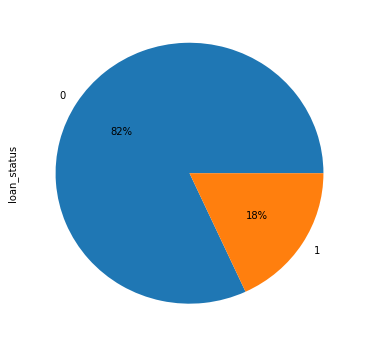

In [103]:
fig,ax=plt.subplots(figsize=(6,6))
loan_data['loan_status'].value_counts().plot(kind = 'pie',autopct='%.0f%%')

不良贷款占总贷款的18%

2、放款金额

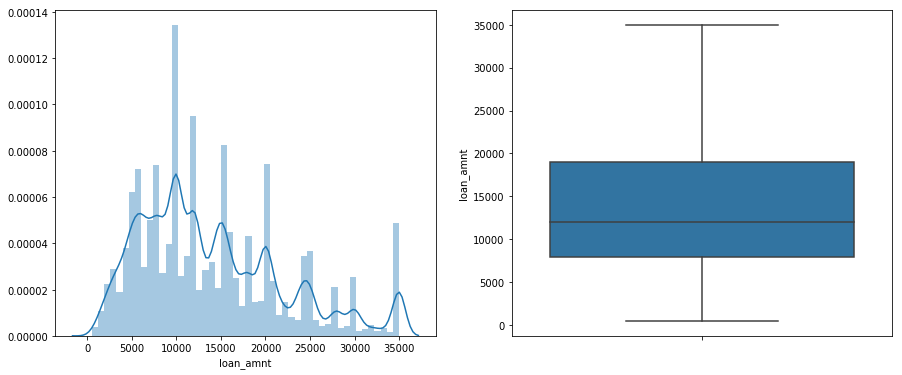

In [104]:
fig,axes=plt.subplots(1,2,figsize=(15,6))
sns.distplot(loan_data.loan_amnt,ax=axes[0])
sns.boxplot(loan_data.loan_amnt,orient='v',ax=axes[1])

大多数贷款金额在8000-20000之间

3、贷款利率

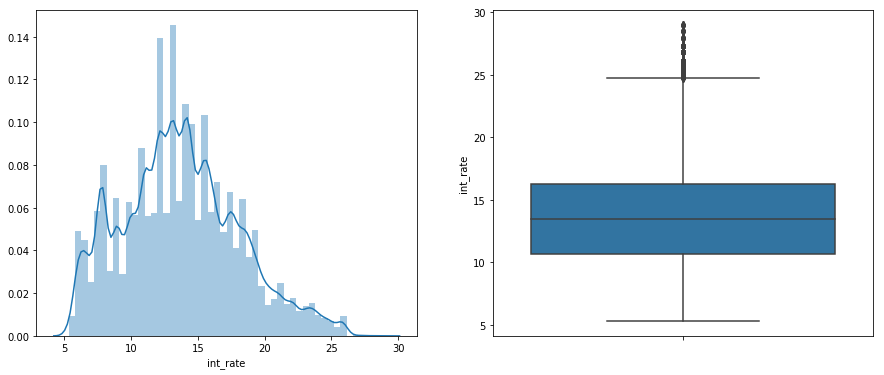

In [105]:
fig,axes=plt.subplots(1,2,figsize=(15,6))
sns.distplot(loan_data.int_rate,ax=axes[0])
sns.boxplot(loan_data.int_rate,orient='v',ax=axes[1])

大多数贷款利率在11%-17%之间

4、年收入

In [106]:
loan_data.annual_inc.describe()

count    236001.0000
mean      72806.9268
std       59309.5117
min        3000.0000
25%       45000.0000
50%       62352.0000
75%       87500.0000
max     8706582.0000
Name: annual_inc, dtype: float64

In [186]:
#删除离群值
q=loan_data.annual_inc.quantile(0.995)
loan_data=loan_data[loan_data.annual_inc<q]
loan_data.annual_inc.describe()

count   234820.0000
mean     70794.1014
std      37415.1053
min       3000.0000
25%      45000.0000
50%      62000.0000
75%      86961.5000
max     296000.0000
Name: annual_inc, dtype: float64

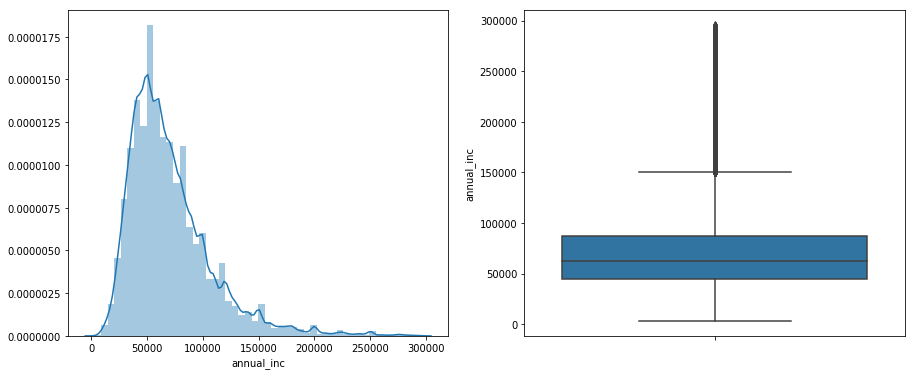

In [108]:
fig,axes=plt.subplots(1,2,figsize=(15,6))
sns.distplot(loan_data.annual_inc,ax=axes[0])
sns.boxplot(loan_data.annual_inc,orient='v',ax=axes[1])

大多数借款者年收入在50000-100000之间

5、贷款目的

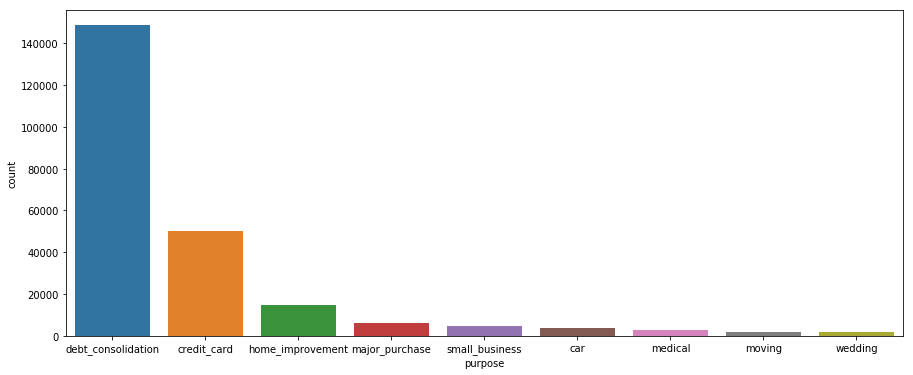

In [109]:
fig,ax=plt.subplots(figsize=(15,6))
sns.countplot(data=loan_data,x=loan_data.purpose,order=loan_data.purpose.value_counts().index)

60%的用户贷款为了还其他途径的贷款（Debt_Consolidation）

6、借款人房产情况

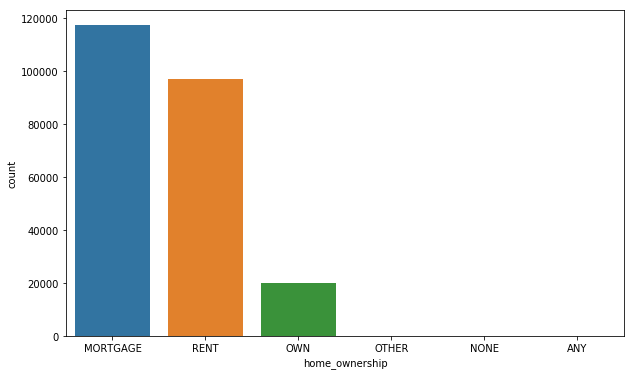

In [110]:
fig,ax=plt.subplots(figsize=(10,6))
sns.countplot(data=loan_data,x=loan_data.home_ownership,order=loan_data.home_ownership.value_counts().index)

In [187]:
remove=['OTHER','NONE','ANY']
loan_data.drop(loan_data[loan_data.home_ownership.isin(remove)].index,inplace=True)
loan_data.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

40%的借款人房子是租来的，52%的借款人房子已经进行过抵押

**多变量分析**

1、贷款目的，贷款金额与贷款状态

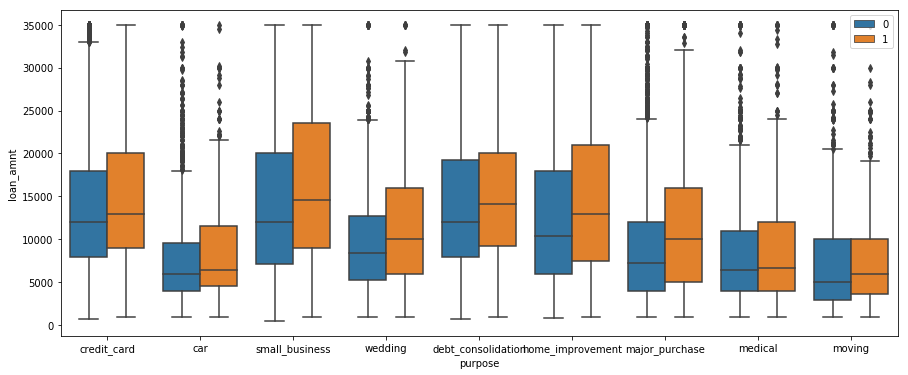

In [112]:
fig,ax=plt.subplots(figsize=(15,6))
sns.boxplot(data=loan_data,x=loan_data['purpose'],y=loan_data['loan_amnt'],hue=loan_data['loan_status'])
ax.legend(loc='upper right')

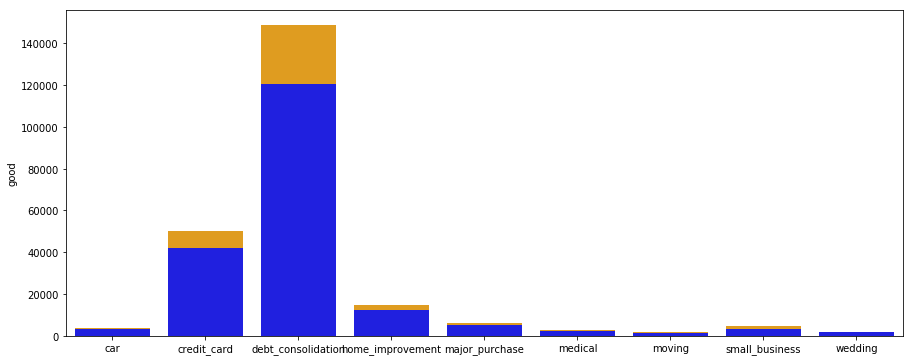

In [113]:
fig,ax=plt.subplots(figsize=(15,6))
purpose_0=loan_data.purpose[loan_data.loan_status==0].value_counts()
purpose_1=loan_data.purpose[loan_data.loan_status==1].value_counts()
df=pd.DataFrame({'good':purpose_0,'bad':purpose_1})
df['loan_status']=df['good']+df['bad']
sns.barplot(data=df,x=df.index,y=df.loan_status,color='orange')
sns.barplot(data=df,x=df.index,y=df.good,color='blue')

信用卡和还其他贷款这两个贷款目的的坏账率更高

2、工作年限，贷款金额与贷款状态

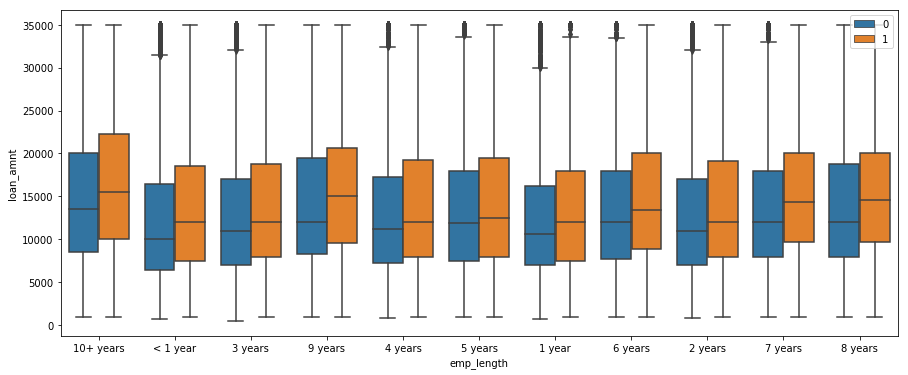

In [114]:
fig,ax=plt.subplots(figsize=(15,6))
sns.boxplot(data=loan_data,x=loan_data.emp_length,y=loan_data.loan_amnt,hue=loan_data.loan_status)
ax.legend(loc='upper right')

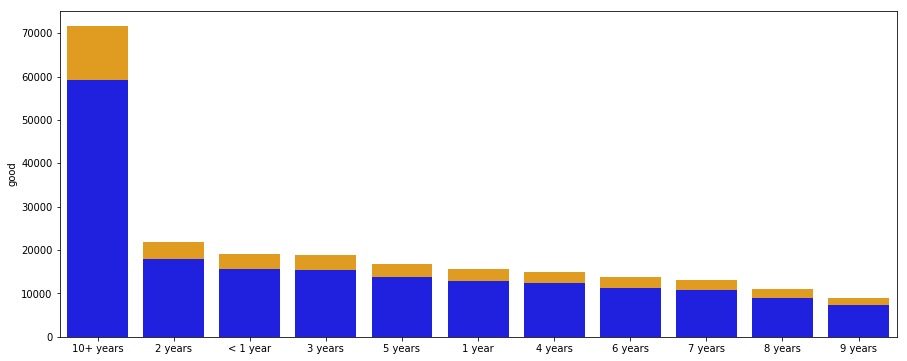

In [115]:
fig,ax=plt.subplots(figsize=(15,6))
emp_length_0=loan_data.emp_length[loan_data.loan_status==0].value_counts()
emp_length_1=loan_data.emp_length[loan_data.loan_status==1].value_counts()
df=pd.DataFrame({'good':emp_length_0,'bad':emp_length_1})
df['loan_status']=df['good']+df['bad']
sns.barplot(data=df,x=df.index,y=df.loan_status,color='orange')
sns.barplot(data=df,x=df.index,y=df.good,color='blue')

3、房产，贷款金额与贷款状态

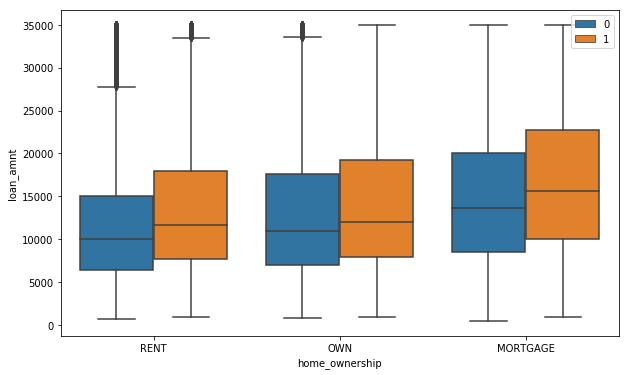

In [116]:
fig,ax=plt.subplots(figsize=(10,6))
sns.boxplot(data=loan_data,x=loan_data.home_ownership,y=loan_data.loan_amnt,hue=loan_data.loan_status)
ax.legend(loc='upper right')

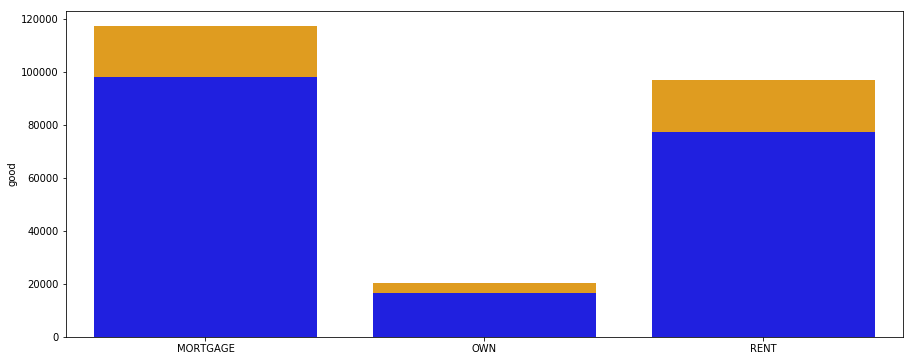

In [117]:
fig,ax=plt.subplots(figsize=(15,6))
home_ownership_0=loan_data.home_ownership[loan_data.loan_status==0].value_counts()
home_ownership_1=loan_data.home_ownership[loan_data.loan_status==1].value_counts()
df=pd.DataFrame({'good':home_ownership_0,'bad':home_ownership_1})
df['loan_status']=df['good']+df['bad']
sns.barplot(data=df,x=df.index,y=df.loan_status,color='orange')
sns.barplot(data=df,x=df.index,y=df.good,color='blue')

租房和房屋已经抵押的借款人坏账率更高

4、利率，贷款金额与贷款状态

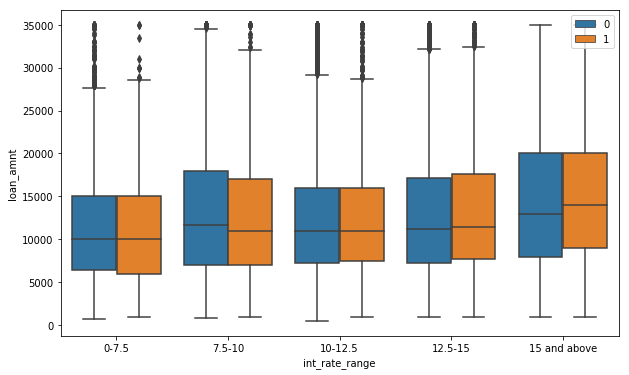

In [118]:
fig,ax=plt.subplots(figsize=(10,6))
sns.boxplot(data=loan_data,x=loan_data.int_rate_range,y=loan_data.loan_amnt,hue=loan_data.loan_status)
ax.legend(loc='upper right')

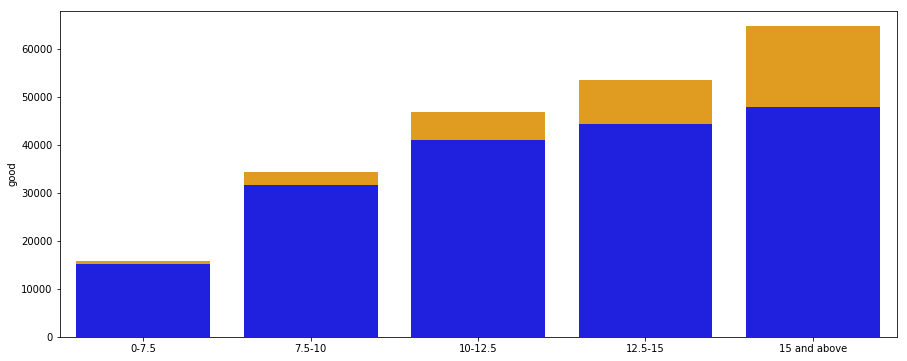

In [119]:
fig,ax=plt.subplots(figsize=(15,6))
int_rate_range_0=loan_data.int_rate_range[loan_data.loan_status==0].value_counts()
int_rate_range_1=loan_data.int_rate_range[loan_data.loan_status==1].value_counts()
df=pd.DataFrame({'good':int_rate_range_0,'bad':int_rate_range_1})
df['loan_status']=df['good']+df['bad']
sns.barplot(data=df,x=df.index,y=df.loan_status,color='orange')
sns.barplot(data=df,x=df.index,y=df.good,color='blue')

借款利率越高，坏账率越高

In [120]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234656 entries, 0 to 887371
Data columns (total 26 columns):
loan_amnt                     234656 non-null float64
term                          234656 non-null object
int_rate                      234656 non-null float64
installment                   234656 non-null float64
grade                         234656 non-null object
emp_title                     234656 non-null object
emp_length                    225608 non-null object
home_ownership                234656 non-null object
annual_inc                    234656 non-null float64
issue_d                       234656 non-null object
loan_status                   234656 non-null int64
purpose                       234656 non-null object
title                         234656 non-null object
addr_state                    234656 non-null object
dti                           234656 non-null float64
delinq_2yrs                   234656 non-null float64
inq_last_6mths                234656

In [146]:
# #类目型特征因子化
# dummies_term=pd.get_dummies(loan_data.term,prefix='term')
# dummies_grade=pd.get_dummies(loan_data.grade,prefix='grade')
# dummies_home_ownership=pd.get_dummies(loan_data.home_ownership,prefix='home_ownership')
# dummies_purpose=pd.get_dummies(loan_data.purpose,prefix='purpose')
# loan_data=pd.concat([loan_data,dummies_term,dummies_grade,dummies_home_ownership,dummies_purpose],axis=1)
# loan_data.drop(['term','grade','home_ownership','purpose'],axis=1,inplace=True)

In [188]:
train_df=loan_data.filter(items=['loan_status','term','loan_amnt','int_rate','grade','home_ownership','purpose','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','collections_12_mths_ex_med','acc_now_delinq','emp_length_int'])
y=train_df['loan_status'].as_matrix()
X=train_df.drop('loan_status',axis=1).as_matrix()

In [189]:
train_df.head(2)

,loan_status,term,loan_amnt,int_rate,grade,home_ownership,purpose,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,emp_length_int
0,0,36 months,5000.0000,10.6500,B,RENT,credit_card,162.8700,24000.0000,27.6500,0.0000,1.0000,3.0000,0.0000,13648.0000,83.7000,9.0000,0.0000,0.0000,10.0000
1,1,60 months,2500.0000,15.2700,C,RENT,car,59.8300,30000.0000,1.0000,0.0000,5.0000,3.0000,0.0000,1687.0000,9.4000,4.0000,0.0000,0.0000,0.5000


In [148]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

训练模型（决策树）

In [211]:
def GradeInt(x):
    if x == "A":
        return 1
    elif x == "B":
        return 2
    elif x == "C":
        return 3
    elif x == "D":
        return 4
    elif x == "E":
        return 5
    else:
        return 6

loan_data['GradeInt'] = loan_data['grade'].map(GradeInt)

In [212]:
from patsy import dmatrices
y,X = dmatrices('loan_status ~ 0 + int_rate + GradeInt + loan_amnt + installment + annual_inc + dti + delinq_2yrs + inq_last_6mths + open_acc + pub_rec + revol_bal + revol_util + total_acc + collections_12_mths_ex_med + acc_now_delinq + emp_length_int + term  + home_ownership + purpose',loan_data, return_type = 'dataframe')

In [213]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [214]:
X_train.head(2)

,term[ 36 months],term[ 60 months],home_ownership[T.OWN],home_ownership[T.RENT],purpose[T.credit_card],purpose[T.debt_consolidation],purpose[T.home_improvement],purpose[T.major_purchase],purpose[T.medical],purpose[T.moving],purpose[T.small_business],purpose[T.wedding],int_rate,GradeInt,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,emp_length_int
222191,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,12.1200,2.0000,5650.0000,187.9900,75000.0000,3.9800,0.0000,1.0000,6.0000,0.0000,11221.0000,93.5000,8.0000,0.0000,0.0000,5.0000
98455,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,12.3500,2.0000,13500.0000,450.6600,75000.0000,11.7800,0.0000,1.0000,7.0000,0.0000,13268.0000,78.5000,30.0000,0.0000,0.0000,10.0000


In [215]:
model = tree.DecisionTreeClassifier(criterion = 'entropy')
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

模型评估

In [216]:
accuracy = metrics.accuracy_score(model.predict(X_test),y_test)
precision = metrics.precision_score(model.predict(X_test),y_test,pos_label=1)
recall = metrics.recall_score(model.predict(X_test),y_test,pos_label=1)
confusion_matrix = metrics.confusion_matrix(y_test,model.predict(X_test),labels=[1,0])

print('正确率:',accuracy)
print('精度:',precision)
print('召回率:',recall)
print(confusion_matrix)


正确率: 0.721422787903
精度: 0.269227747663
召回率: 0.249490390215
[[ 3427  9302]
 [10309 47359]]


调参

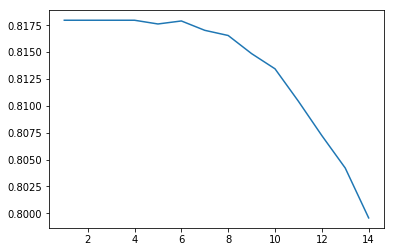

In [217]:
best_model=[]
for i in range(1,15):
    model = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=i)    
    kfold = StratifiedKFold(n_splits= 10, shuffle = True)
    scores = cross_val_score(model, X_train, y_train, cv = kfold )
    best_model.append(scores.mean())

plt.plot(range(1,15),best_model)

In [218]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.grid_search import RandomizedSearchCV
from scipy.stats import randint as sp_randint
param_dist = {    "max_depth": sp_randint(1,8),
                  "max_features": sp_randint(3,15),
                  "max_leaf_nodes": [10,20,30,40,50],
                  "min_samples_leaf": [25,50,75,100,150,250,500],
                 }
random_search = RandomizedSearchCV(model,
                        param_distributions=param_dist,
                        n_iter=50)

random_search.fit(X_train, y_train)
print(random_search.best_score_)
print(random_search.best_estimator_)

IndexError: too many indices for array

In [170]:
best_model=random_search.best_estimator_

from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(best_model, random_state=1)
bagging.fit(X,y)

accuracy = metrics.accuracy_score(bagging.predict(X_test),y_test)
precision = metrics.precision_score(bagging.predict(X_test),y_test,pos_label=1)
recall = metrics.recall_score(bagging.predict(X_test),y_test,pos_label=1)
confusion_matrix = metrics.confusion_matrix(y_test,bagging.predict(X_test),labels=[1,0])

print('正确率:',accuracy)
print('精度:',precision)
print('召回率:',recall)
print(confusion_matrix)


正确率: 0.818898532608
精度: 0.00235054454282
召回率: 0.652173913043
[[   30 12733]
 [   16 57618]]
